In [1]:
using Plots
pyplot()
using Sundials

In [2]:
push!(LOAD_PATH, "../src/");

In [3]:
using Setup
using HeatCapacity
using NeutronStar
using SpecHeat
using Simpson
using SuperfluidGaps
using NeutrinoLum
using DifferentialEquations
using PhotonLum
using NeutrinoPBF

In [4]:
include("../src/PhysicalConstants.jl");

In [5]:
function f(u,p,t)
    var.Tinf = u
    set_Tlocal(core, var)
    set_vn(model, core, var)
    set_vp(model, core, var)
    C = get_Ce(model, core, var) + get_Cmu(model, core, var) + get_Cn(model, core, var) + get_Cp(model, core, var)
    Lnu = L_murca_n_e(model, core, var) + L_murca_n_mu(model, core, var) + L_murca_p_e(model, core, var) + L_murca_p_mu(model, core, var)
    if lowercase(model.SFtype_n) != "normal"
        Lnu += L_PBF_n(model, core, var)
    end
    if lowercase(model.SFtype_p) != "normal"
        Lnu += L_PBF_p(model, core, var)
    end
    return (-Lnu/C - L_photon(model, env, var)/C) * yrTosec
end

f (generic function with 1 method)

In [6]:
model, core, env, var = setup("../src/sample.ini");
var.Tinf = 1e10
u0 = var.Tinf
tspan = (0.1, 1e9)
prob = ODEProblem(f, u0, tspan)
sol = solve(prob,CVODE_Adams());

In [7]:
model, core, env, var = setup("../src/sample2.ini");
var.Tinf = 1e10
u0 = var.Tinf
set_vn(model, core, var)
set_vp(model, core, var)
tspan = (0.1, 3e6)
prob = ODEProblem(f, u0, tspan)
sol2 = solve(prob,CVODE_Adams(), reltol=1e-10, abstol=1e-10);

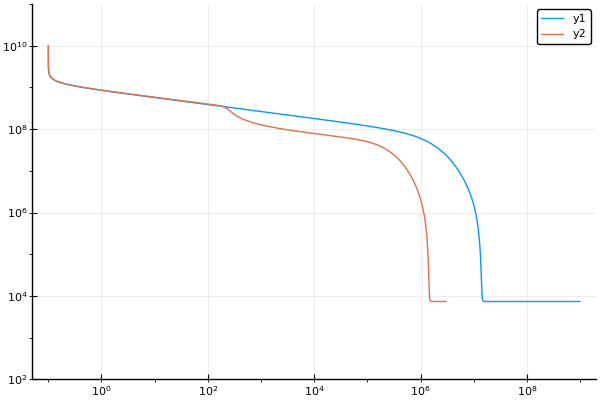

In [8]:
plot(sol.t, sol.u, scale=:log10, yscale=:log10)
plot!(sol2.t, sol2.u, scale=:log10, yscale=:log10)
ylims!(1e2,1e11)